# feature engineering

In feature engineering, you create new varaibles as functions of existing variables in your data. 

In [10]:
# import libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sb

In [11]:
# load the data
pokemon = pd.read_csv('../1. Data Files/pokemon.csv')

In [12]:
# data info
pokemon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 807 entries, 0 to 806
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               807 non-null    int64  
 1   species          807 non-null    object 
 2   generation_id    807 non-null    int64  
 3   height           807 non-null    float64
 4   weight           807 non-null    float64
 5   base_experience  807 non-null    int64  
 6   type_1           807 non-null    object 
 7   type_2           405 non-null    object 
 8   hp               807 non-null    int64  
 9   attack           807 non-null    int64  
 10  defense          807 non-null    int64  
 11  speed            807 non-null    int64  
 12  special-attack   807 non-null    int64  
 13  special-defense  807 non-null    int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 88.4+ KB


In [13]:
# data head
pokemon.head()

,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65


Look at biases in pokemon creature statistics. Know if a creature's offensive stats are biased towards physical or special-attack,if their defensive stats are similarly biased towards physical or special defense. 

create new variables based on ratios.
The attack ratio clumn is the ratio between attack and special attack. If a creature has a value greater than one, then they favored the physical side, and if less than one, they favored the special side. Same for the defensive statistics.

In [14]:
pokemon['atk_ratio']=pokemon['attack']/pokemon['special-attack']
pokemon['def_ratio']=pokemon['defense']/pokemon['special-defense']

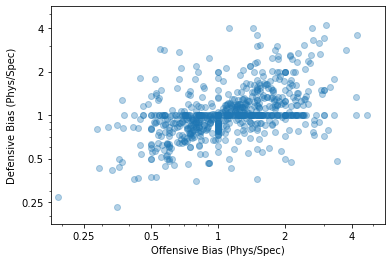

In [15]:
# basic scatter plot of the two
plt.scatter(data=pokemon, x='atk_ratio', y='def_ratio', alpha=1/3);
plt.xlabel('Offensive Bias (Phys/Spec)');
plt.ylabel('Defensive Bias (Phys/Spec)');
plt.xscale('log');
plt.yscale('log');
tick_loc=[0.25,0.5,1,2,4]
plt.xticks(tick_loc, tick_loc);
plt.yticks(tick_loc, tick_loc);
plt.xlim(2 ** -2.5, 2 ** 2.5);
plt.ylim(2 ** -2.5, 2 ** 2.5);

Most points seem to fall along a diagonal line. In the upper right hand quadrant, we have pokemon species that are physical biased in both offense and defense, in the lower left hand quadrant,they are special biased in both offense and defense. 

Interestingly, there appears to be a large number of Pokemon on the y equals to one line showing no defensive bias. These pokemon have a wide range of offensive biases. 

There appeared to be much fewer pokemon on the x equals one line showing no offensive bias. Findings like these would be difficult to come by and summarize without feature engineering.